# Importing Libraries and loading Data

In [1]:
#importing basic libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing neural network libraries and various layers

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [3]:
#loading and analysing data

df = pd.read_csv("../input/state-farm-distracted-driver-detection/driver_imgs_list.csv")
df

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg
...,...,...,...
22419,p081,c9,img_56936.jpg
22420,p081,c9,img_46218.jpg
22421,p081,c9,img_25946.jpg
22422,p081,c9,img_67850.jpg


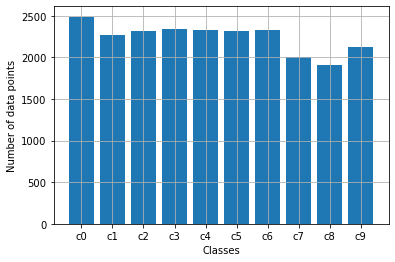

In [4]:
classSeries = df['classname'].value_counts().sort_index()

plt.bar(classSeries.index, classSeries.values)
plt.xlabel("Classes")
plt.ylabel("Number of data points")
plt.grid()
plt.show()

In [4]:
#mapping classnames to different integers and vice-versa

i = 0
classToIntegers = {}
integersToClasses = {}
for classes in sorted(list(set(df['classname']))):
    classToIntegers[classes] = i
    integersToClasses[i] = classes
    i += 1
classToIntegers, integersToClasses   

({'c0': 0,
  'c1': 1,
  'c2': 2,
  'c3': 3,
  'c4': 4,
  'c5': 5,
  'c6': 6,
  'c7': 7,
  'c8': 8,
  'c9': 9},
 {0: 'c0',
  1: 'c1',
  2: 'c2',
  3: 'c3',
  4: 'c4',
  5: 'c5',
  6: 'c6',
  7: 'c7',
  8: 'c8',
  9: 'c9'})

In [5]:
#replace the classnames with the corresponding mapped integers

df['classname'].replace(classToIntegers, inplace=True)
df

,subject,classname,img
0,p002,0,img_44733.jpg
1,p002,0,img_72999.jpg
2,p002,0,img_25094.jpg
3,p002,0,img_69092.jpg
4,p002,0,img_92629.jpg
...,...,...,...
22419,p081,9,img_56936.jpg
22420,p081,9,img_46218.jpg
22421,p081,9,img_25946.jpg
22422,p081,9,img_67850.jpg


In [6]:
#converting the classnames to one hot encoded form

from keras.utils import to_categorical
labels = to_categorical(df['classname'], num_classes = 10)
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [7]:
#splitting the data into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['img'].values.reshape((-1, 1)), labels, test_size = 0.3, random_state = 1)

In [8]:
x_train.shape, y_train.shape

((15696, 1), (15696, 10))

In [9]:
x_test.shape, y_test.shape

((6728, 1), (6728, 10))

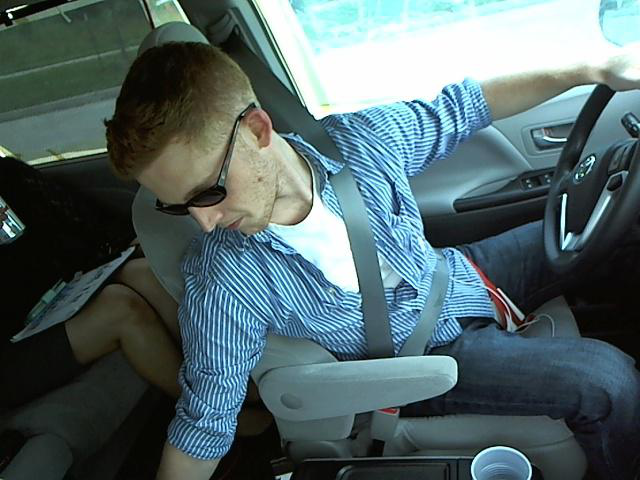

In [12]:
#a random image

sample_img_path = "../input/state-farm-distracted-driver-detection/imgs/train/c7/img_100285.jpg"
sample_img = load_img(sample_img_path)
sample_img

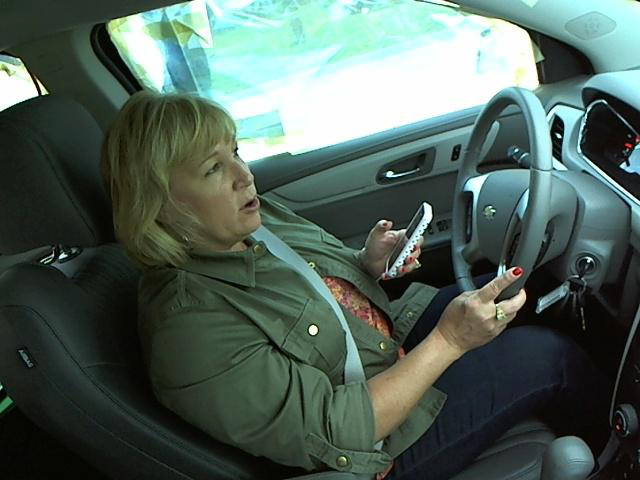

In [13]:
#a random image

sample_img_path = '../input/state-farm-distracted-driver-detection/imgs/train/c3/img_10068.jpg'
sample_img = load_img(sample_img_path)
sample_img

In [11]:
#importing the standard libraries

import os
from keras.preprocessing.image import load_img, img_to_array, array_to_img

base_path = '../input/state-farm-distracted-driver-detection/imgs/train'


#this function will load the images from the dataset and will
#convert them to the required format for training and testing
def buildData(x, y):
    
    #convert the labels from one hot encoded to 1D
    classes = y.argmax(axis = 1)
    
    #this will store the image arrays of all the images
    data = []
    
    #looping through every image in x
    for i, imgName in enumerate(x):    
        className = integersToClasses[classes[i]]
        imgPath = os.path.join(base_path, className, imgName)
        
        #load the image
        img = load_img(imgPath, target_size = (100, 100))
        
        #convert the image to an array
        img_arr = img_to_array(img)
        
        #append the image array to the data
        data.append(img_arr)
      
    #return data
    return np.array(data)

In [14]:
#getting the training and testing data by calling the above function

x_train = buildData(x_train[:, 0], y_train)
x_test = buildData(x_test[:, 0], y_test)

In [15]:
x_train.shape, x_test.shape

((15696, 100, 100, 3), (6728, 100, 100, 3))

In [16]:
x_train

array([[[[ 46.,  57.,  43.],
         [ 45.,  57.,  43.],
         [ 55.,  63.,  48.],
         ...,
         [159., 255., 255.],
         [179., 251., 250.],
         [193., 241., 245.]],

        [[ 60.,  76.,  49.],
         [ 59.,  79.,  51.],
         [ 61.,  85.,  63.],
         ...,
         [156., 246., 236.],
         [178., 255., 254.],
         [172., 253., 246.]],

        [[177., 225., 187.],
         [166., 216., 178.],
         [174., 226., 190.],
         ...,
         [170., 252., 250.],
         [183., 248., 250.],
         [176., 253., 247.]],

        ...,

        [[  7.,   8.,   3.],
         [  7.,   8.,   3.],
         [  6.,   7.,   2.],
         ...,
         [  0.,  28.,  26.],
         [ 17.,  15.,  16.],
         [ 17.,  16.,  12.]],

        [[  4.,   5.,   0.],
         [  6.,   7.,   2.],
         [  7.,   8.,   3.],
         ...,
         [ 80.,  90., 100.],
         [ 15.,  13.,  16.],
         [ 20.,  18.,  19.]],

        [[  6.,   7.,   2.],
       

In [17]:
x_test

array([[[[ 32.,  45.,  35.],
         [ 32.,  45.,  35.],
         [ 34.,  47.,  40.],
         ...,
         [  0.,  17.,   0.],
         [200., 236., 200.],
         [246., 255., 252.]],

        [[ 33.,  46.,  36.],
         [ 32.,  45.,  35.],
         [ 35.,  48.,  39.],
         ...,
         [205., 255., 221.],
         [203., 237., 202.],
         [  0.,  16.,   0.]],

        [[ 34.,  47.,  37.],
         [ 32.,  45.,  35.],
         [ 32.,  45.,  35.],
         ...,
         [187., 255., 237.],
         [201., 254., 236.],
         [228., 255., 250.]],

        ...,

        [[  5.,   6.,   1.],
         [  5.,   6.,   1.],
         [  5.,   6.,   1.],
         ...,
         [ 12.,  11.,   9.],
         [ 15.,  14.,  12.],
         [ 23.,  11.,  13.]],

        [[  6.,   7.,   2.],
         [  5.,   6.,   1.],
         [  6.,   7.,   2.],
         ...,
         [ 18.,  12.,  12.],
         [ 13.,  12.,  10.],
         [ 19.,   9.,  10.]],

        [[  6.,   7.,   2.],
       

# Using pre-trained VGG16 Model

In [18]:
#importing the vgg16 model and preprocess_input

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input as ppvgg16

In [16]:
#loading the vgg16 model without the output layer

model = VGG16(include_top = False)
model.summary()

58892288/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

In [19]:
#preprocessing the x_train and x_test to convert them
#to the format required by vgg16

x_train_vgg16 = ppvgg16(x_train)
x_test_vgg16 = ppvgg16(x_test)

In [23]:
#running the preprocessed x_train and x_test through the vgg16 network

train_output_vgg16 = model.predict(x_train_vgg16, verbose=1)
test_output_vgg16 = model.predict(x_test_vgg16, verbose=1)

211/211 [==============================] - 299s 1s/step


In [25]:
train_output_vgg16.shape, test_output_vgg16.shape

((15696, 3, 3, 512), (6728, 3, 3, 512))

In [68]:
#creating a model for getting the output using the output of the above vgg16 model

vgg16Model = Sequential()
vgg16Model.add(Flatten(input_shape = (3,3,512)))
vgg16Model.add(Dense(64, activation='relu'))
vgg16Model.add(Dropout(rate=0.2))
vgg16Model.add(Dense(10, activation='softmax'))
vgg16Model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                294976    
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 295,626
Trainable params: 295,626
Non-trainable params: 0
_________________________________________________________________


In [69]:
#compiling the model

vgg16Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=10, min_delta = 0.001)

In [71]:
#fitting the model

vgg16_history = vgg16Model.fit(train_output_vgg16, y_train, validation_data = (test_output_vgg16, y_test), epochs = 50, batch_size = 64, callbacks=[es])

Epoch 1/50
246/246 [==============================] - 1s 4ms/step - loss: 4.3172 - accuracy: 0.1920 - val_loss: 1.3491 - val_accuracy: 0.5254
Epoch 2/50
246/246 [==============================] - 1s 4ms/step - loss: 1.3601 - accuracy: 0.4928 - val_loss: 0.7719 - val_accuracy: 0.7377
Epoch 3/50
246/246 [==============================] - 1s 4ms/step - loss: 0.9870 - accuracy: 0.6380 - val_loss: 0.4437 - val_accuracy: 0.8615
Epoch 4/50
246/246 [==============================] - 1s 4ms/step - loss: 0.7040 - accuracy: 0.7258 - val_loss: 0.3215 - val_accuracy: 0.9077
Epoch 5/50
246/246 [==============================] - 1s 4ms/step - loss: 0.5961 - accuracy: 0.7719 - val_loss: 0.2556 - val_accuracy: 0.9339
Epoch 6/50
246/246 [==============================] - 1s 4ms/step - loss: 0.5339 - accuracy: 0.7930 - val_loss: 0.3007 - val_accuracy: 0.9226
Epoch 7/50
246/246 [==============================] - 1s 4ms/step - loss: 0.4911 - accuracy: 0.8031 - val_loss: 0.2502 - val_accuracy: 0.9282
Epoch 

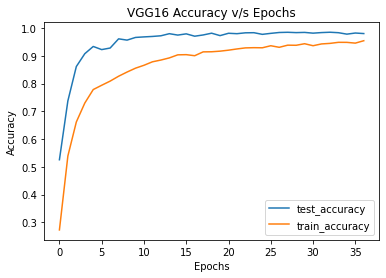

In [72]:
#plotting train and test accuracy for VGG16 Model

plt.plot(vgg16_history.history['val_accuracy'], label='test_accuracy')
plt.plot(vgg16_history.history['accuracy'], label='train_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("VGG16 Accuracy v/s Epochs")
plt.show()

Best Test Accuracy using VGG16 = 0.9851

# Using the pre-trained InceptionV3 Model

In [16]:
#importing the InceptionV3 model and preprocess_input

from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input as pp_inceptionV3

In [17]:
#loading the InceptionV3 model without the output layer

inception = InceptionV3(include_top = False)
inception.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________

In [18]:
#preprocessing the x_train and x_test to convert them
#to the format required by InceptionV3

x_train_inception = pp_inceptionV3(x_train)
x_test_inception = pp_inceptionV3(x_test)

In [19]:
#running the preprocessed x_train and x_test through the InceptionV3 network

train_output_inception = inception.predict(x_train_inception, verbose=1)
test_output_inception = inception.predict(x_test_inception, verbose=1)

211/211 [==============================] - 50s 237ms/step


In [23]:
train_output_inception.shape, test_output_inception.shape

((15696, 1, 1, 2048), (6728, 1, 1, 2048))

In [29]:
#creating a model for getting the output using the output of the above InceptionV3 model 

inception_v3_model = Sequential()
inception_v3_model.add(Flatten(input_shape = train_output_inception.shape[1:]))
inception_v3_model.add(Dense(64, activation='relu'))
inception_v3_model.add(Dropout(rate=0.2))
inception_v3_model.add(Dense(10, activation='softmax'))
inception_v3_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                131136    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 131,786
Trainable params: 131,786
Non-trainable params: 0
_________________________________________________________________


In [30]:
#compiling the model

inception_v3_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
es = EarlyStopping(monitor='val_accuracy', patience=20, min_delta = 0.001)

In [32]:
#fitting the model

inceptionV3_history = inception_v3_model.fit(train_output_inception, y_train, 
                                             validation_data = (test_output_inception, y_test), 
                                             epochs = 150, batch_size = 64, callbacks=[es])

Epoch 1/150
246/246 [==============================] - 1s 4ms/step - loss: 1.9985 - accuracy: 0.2961 - val_loss: 1.1349 - val_accuracy: 0.6461
Epoch 2/150
246/246 [==============================] - 1s 4ms/step - loss: 1.1633 - accuracy: 0.6100 - val_loss: 0.8616 - val_accuracy: 0.7427
Epoch 3/150
246/246 [==============================] - 1s 4ms/step - loss: 0.9081 - accuracy: 0.7017 - val_loss: 0.7264 - val_accuracy: 0.7744
Epoch 4/150
246/246 [==============================] - 1s 3ms/step - loss: 0.7590 - accuracy: 0.7488 - val_loss: 0.6544 - val_accuracy: 0.7985
Epoch 5/150
246/246 [==============================] - 1s 3ms/step - loss: 0.6601 - accuracy: 0.7821 - val_loss: 0.5870 - val_accuracy: 0.8126
Epoch 6/150
246/246 [==============================] - 1s 4ms/step - loss: 0.5860 - accuracy: 0.8081 - val_loss: 0.5625 - val_accuracy: 0.8230
Epoch 7/150
246/246 [==============================] - 1s 4ms/step - loss: 0.5271 - accuracy: 0.8222 - val_loss: 0.5203 - val_accuracy: 0.8322

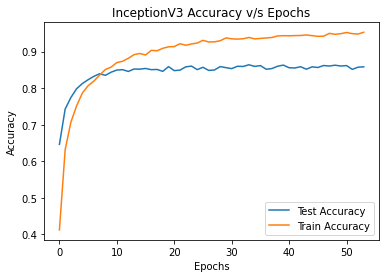

In [33]:
#plotting the train accuracy and test accuracy for InceptionV3 Model

plt.plot(inceptionV3_history.history['val_accuracy'], label = 'Test Accuracy')
plt.plot(inceptionV3_history.history['accuracy'], label = 'Train Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("InceptionV3 Accuracy v/s Epochs")
plt.show()

Best Test Accuracy using InceptionV3 = 0.8639

# Using pre-trained ResNet50 Model

In [21]:
#importing the ResNet50 model and preprocess_input

from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input as pp_resnet50

In [22]:
#loading the ResNet50 model without the output layer

resnet50 = ResNet50(include_top = False)
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [23]:
#preprocessing the x_train and x_test to convert them
#to the format required by ResNet50

x_train_resnet = pp_resnet50(x_train)
x_test_resnet = pp_resnet50(x_test)

In [25]:
#running the preprocessed x_train through the ResNet50 network

train_output_resnet50 = resnet50.predict(x_train_resnet, verbose=1)

491/491 [==============================] - 315s 642ms/step


In [26]:
#running the preprocessed x_test through the ResNet50 network

test_output_resnet50 = resnet50.predict(x_test_resnet, verbose=1)

211/211 [==============================] - 134s 634ms/step


In [27]:
train_output_resnet50.shape, test_output_resnet50.shape

((15696, 4, 4, 2048), (6728, 4, 4, 2048))

In [28]:
#creating a model for getting the output using the output of the above ResNet50 model 

resnet50_model = Sequential()
resnet50_model.add(Flatten(input_shape = train_output_resnet50.shape[1:]))
resnet50_model.add(Dense(64, activation='relu'))
resnet50_model.add(Dropout(rate=0.2))
resnet50_model.add(Dense(10, activation='softmax'))
resnet50_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                2097216   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 2,097,866
Trainable params: 2,097,866
Non-trainable params: 0
_________________________________________________________________


In [29]:
#compiling the model

resnet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
es = EarlyStopping(monitor='val_accuracy', patience=10, min_delta=0.001)

In [33]:
#fitting the model

resnet50_history = resnet50_model.fit(train_output_resnet50, y_train, 
                                      validation_data = (test_output_resnet50, y_test), 
                                      epochs = 150, batch_size = 64, callbacks=[es])

Epoch 1/150
246/246 [==============================] - 6s 23ms/step - loss: 2.9029 - accuracy: 0.1135 - val_loss: 2.2612 - val_accuracy: 0.1143
Epoch 2/150
246/246 [==============================] - 4s 18ms/step - loss: 2.2430 - accuracy: 0.1294 - val_loss: 2.1581 - val_accuracy: 0.1842
Epoch 3/150
246/246 [==============================] - 4s 18ms/step - loss: 2.1326 - accuracy: 0.1819 - val_loss: 1.8864 - val_accuracy: 0.2806
Epoch 4/150
246/246 [==============================] - 4s 18ms/step - loss: 1.9411 - accuracy: 0.2487 - val_loss: 1.7057 - val_accuracy: 0.3511
Epoch 5/150
246/246 [==============================] - 4s 18ms/step - loss: 1.7987 - accuracy: 0.2946 - val_loss: 1.5341 - val_accuracy: 0.4202
Epoch 6/150
246/246 [==============================] - 4s 17ms/step - loss: 1.6527 - accuracy: 0.3429 - val_loss: 1.3213 - val_accuracy: 0.4886
Epoch 7/150
246/246 [==============================] - 4s 17ms/step - loss: 1.4619 - accuracy: 0.4272 - val_loss: 1.0681 - val_accuracy:

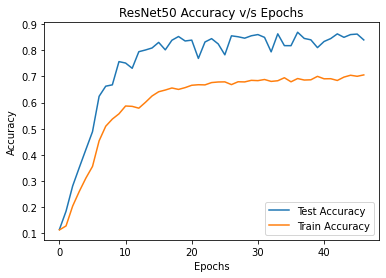

In [35]:
#plotting the train and test accuracy for ResNet50 Model

plt.plot(resnet50_history.history['val_accuracy'], label = 'Test Accuracy')
plt.plot(resnet50_history.history['accuracy'], label = 'Train Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("ResNet50 Accuracy v/s Epochs")
plt.show()

Best Test Accuracy using ResNet50 = 0.8630

# Building our own Model

In [23]:
#using data augmentation to generate new related images for training the network

from keras.preprocessing.image import ImageDataGenerator

EPOCHS = 10
BATCH_SIZE = 64

train_generator = ImageDataGenerator(rescale = 1./255, rotation_range=20, zoom_range=0.15, 
                                     width_shift_range=0.2, height_shift_range=0.2, 
                                     shear_range=0.15, fill_mode="nearest") 


test_generator = ImageDataGenerator(rescale = 1./255) 

In [24]:
#creating our model

network = Sequential()

network.add(Conv2D(512, (3,3), activation='relu', input_shape = (100, 100, 3)))
network.add(MaxPooling2D((2, 2)))
network.add(Conv2D(128, (3,3), activation='relu'))
network.add(MaxPooling2D((2, 2)))
network.add(Conv2D(64, (3,3), activation='relu'))
network.add(MaxPooling2D((2, 2)))
network.add(Conv2D(64, (3,3), activation='relu'))
network.add(MaxPooling2D((2, 2)))
network.add(Flatten())
network.add(Dense(1024, activation='relu'))
network.add(Dense(512, activation='relu'))
network.add(Dropout(rate=0.2))
network.add(Dense(10, activation='softmax'))

network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 512)       14336     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 512)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 128)       589952    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 64)        73792     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)         

In [25]:
#compiling the model

network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
es = EarlyStopping(monitor='val_accuracy', patience=10, min_delta=0.001)

In [ ]:
#fitting our model --> this takes a lot of time to train on the large x_train from scratch combined with data augmentation

network_history = network.fit(train_generator.flow(x_train, y_train, batch_size = BATCH_SIZE), 
                              epochs = EPOCHS, steps_per_epoch = len(x_train)//BATCH_SIZE, 
                              validation_data = test_generator.flow(x_test, y_test, batch_size = BATCH_SIZE), 
                              callbacks=[es])

Epoch 1/10
245/245 [==============================] - 2087s 9s/step - loss: 2.2966 - accuracy: 0.1088 - val_loss: 1.5127 - val_accuracy: 0.4041
Epoch 2/10
245/245 [==============================] - 2085s 9s/step - loss: 1.6550 - accuracy: 0.3788 - val_loss: 1.0184 - val_accuracy: 0.6232
Epoch 3/10
245/245 [==============================] - 2078s 8s/step - loss: 1.2157 - accuracy: 0.5548 - val_loss: 0.6773 - val_accuracy: 0.7656
Epoch 4/10
245/245 [==============================] - 2083s 9s/step - loss: 0.8548 - accuracy: 0.6999 - val_loss: 0.4105 - val_accuracy: 0.8570
Epoch 5/10
245/245 [==============================] - 2083s 9s/step - loss: 0.6489 - accuracy: 0.7742 - val_loss: 0.3600 - val_accuracy: 0.8802
Epoch 6/10
245/245 [==============================] - 2093s 9s/step - loss: 0.5301 - accuracy: 0.8198 - val_loss: 0.3212 - val_accuracy: 0.8890
Epoch 7/10
245/245 [==============================] - 2099s 9s/step - loss: 0.4739 - accuracy: 0.8327 - val_loss: 0.2845 - val_accuracy:

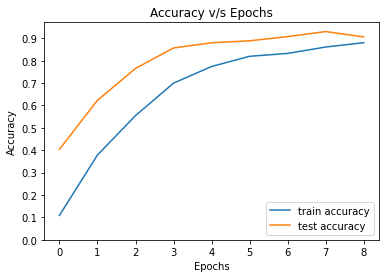

In [7]:
#plotting train and test accuracy for our model

plt.plot(network_history.history['val_accuracy'], label='test_accuracy')
plt.plot(network_history.history['accuracy'], label='train_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy v/s Epochs")
plt.show()


Best Test Accuracy using our own model = 0.9303